# Кластеризация

Реализовать алгоритмы кластеризации:
* KMeans(random)
* MiniBatchKMeans

Прототип класса:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

params = {'figure.subplot.left': 0.0,
          'figure.figsize': (10, 10),
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}
plt.rcParams.update(params)

fig = plt.figure()

In [2]:
class KMean:  # или MiniBatchKMeans
    def __init__(self, clusters):
        self.clusters = clusters

    def __init_mass_centers(self):
        self.d_depth = self.data.shape[1]
        return np.random.randint(self.data.min(), self.data.max(), [self.clusters, self.d_depth])

    def __init_list_of_objects(self):
        list_of_objects = list()
        for i in range(0, self.clusters):
            list_of_objects.append(list())
        return list_of_objects

    def __rclc_mass_centers(self, new_cnt):
        for string_n in range(len(self.cent_data)):
            if len(self.cent_data[string_n]) > 0:
                new_cen = np.zeros([1, self.data.shape[1]])
                for elem_s in range(len(self.cent_data[string_n])):
                    new_cen = new_cen + self.data[self.cent_data[string_n][elem_s]]
                dif_cen = (new_cen / (len(self.cent_data[string_n]))).astype(int)
                if (self.cntrs[string_n] - dif_cen != np.zeros([1, self.data.shape[1]])).all():
                    new_cnt += 1
                    self.cntrs[string_n] = dif_cen
        return new_cnt

    def fit(self, data_g):
        t1 = time.time()
        self.data = data_g
        self.cntrs = self.__init_mass_centers()
        print("Dots moved:", "\t", "Step time sec:")
        new_cnt = 1
        while new_cnt > 0:
            t0 = time.time()
            new_cnt = 0
            self.cent_data = self.__init_list_of_objects()
            for dot in range(len(self.data)):
                clust_dist = np.sum(np.abs(self.cntrs - np.array([self.data[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
                min_ind = clust_dist.argmin()
                self.cent_data[min_ind].append(dot)
            new_cnt = self.__rclc_mass_centers(new_cnt)
            print("%11d \t %.3f" % (new_cnt, time.time() - t0))

        print("Done in: ")   
        print("%.3fsec" % (time.time() - t1))
        return self

    def predict(self, data_g):
        t1 = time.time()
        predict_cent_data = self.__init_list_of_objects()
        for dot in range(len(data_g)):
            clust_dist = np.sum(np.abs(self.cntrs - np.array([data_g[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
            min_ind = clust_dist.argmin()
            predict_cent_data[min_ind].append(dot)

        new_data = np.zeros(data_g.shape)
        for row in range(len(predict_cent_data)):
            for item in range(len(predict_cent_data[row])):
                new_data[predict_cent_data[row][item]] = self.cntrs[row]
        print("Done in: ")
        print(time.time() - t1)
        return new_data

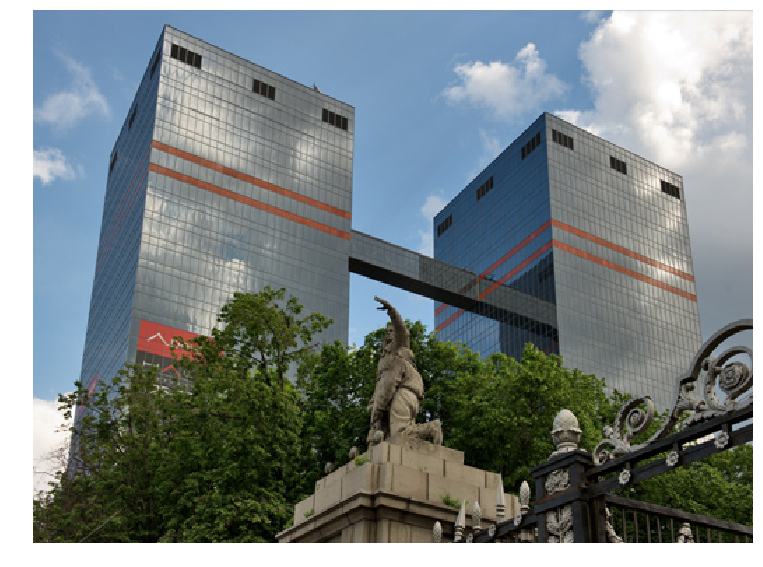

(381, 515, 3)
Dots moved: 	 Step time sec:
         28 	 5.358
         22 	 5.224
         19 	 5.232
         15 	 5.237
         16 	 5.246
         13 	 5.237
          9 	 5.214
          7 	 5.205
          8 	 5.207
          9 	 5.213
          8 	 5.224
          8 	 5.204
          7 	 5.236
          8 	 5.238
          7 	 5.231
          4 	 5.209
          4 	 5.224
          4 	 5.528
          4 	 5.216
          2 	 5.212
          2 	 5.229
          1 	 5.231
          2 	 5.247
          2 	 5.549
          1 	 5.221
          1 	 5.239
          2 	 5.221
          2 	 5.217
          2 	 5.690
          2 	 5.200
          3 	 5.209
          2 	 5.216
          1 	 5.206
          0 	 5.214
Done in: 
178.786sec


In [3]:
image = mpimg.imread('./mailru.jpg')
plt.axis("off")
plt.imshow(image)
plt.show()

data = image.reshape((image.shape[0] * image.shape[1], 3))
clusters = 64
print(image.shape)
new_cntrs = KMean(clusters).fit(data)

Done in: 
5.343429088592529
(381, 515, 3)


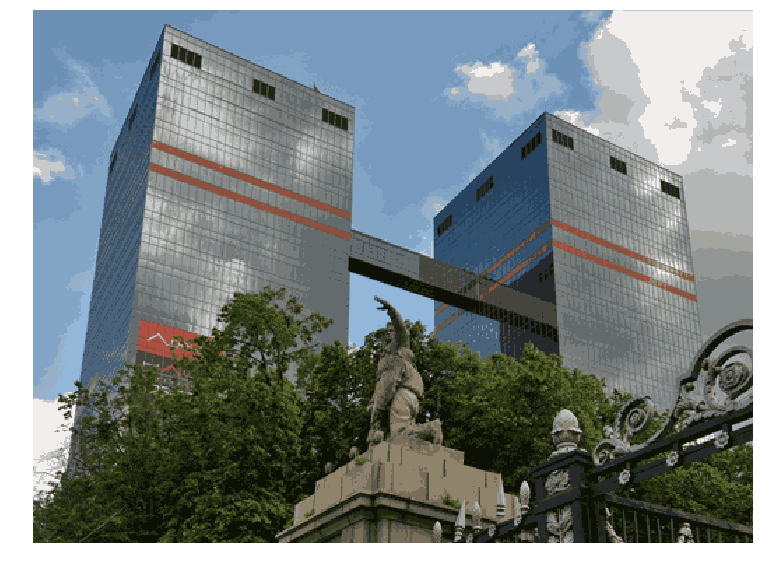

In [7]:
image_g = mpimg.imread('./mailru.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_cntrs.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)

plt.axis("off")
plt.imshow(image_g)
plt.imshow(new_image)
plt.show()

Done in: 
7.934527397155762
(437, 700, 3)


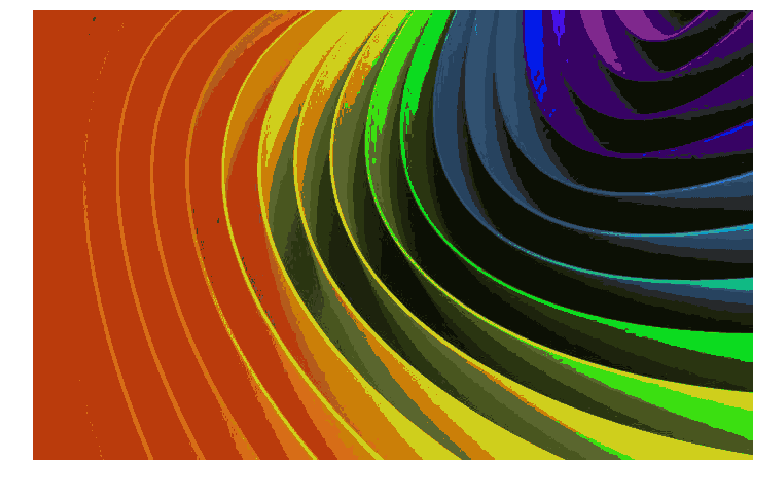

In [8]:
image_g = mpimg.imread('./colors.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_cntrs.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)

plt.axis("off")
plt.imshow(image_g)
plt.imshow(new_image)
plt.show()

Done in: 
2.325575113296509
(225, 400, 3)


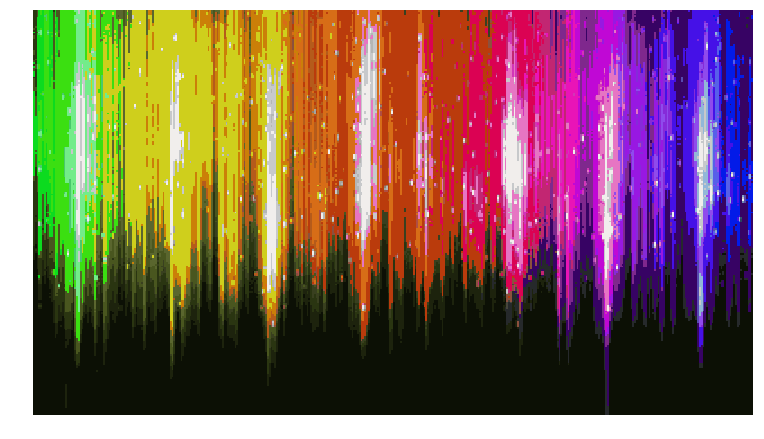

In [9]:
image_g = mpimg.imread('./363.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_cntrs.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)

plt.axis("off")
plt.imshow(new_image)
plt.show()

Done in: 
27.010347843170166
(1080, 972, 3)


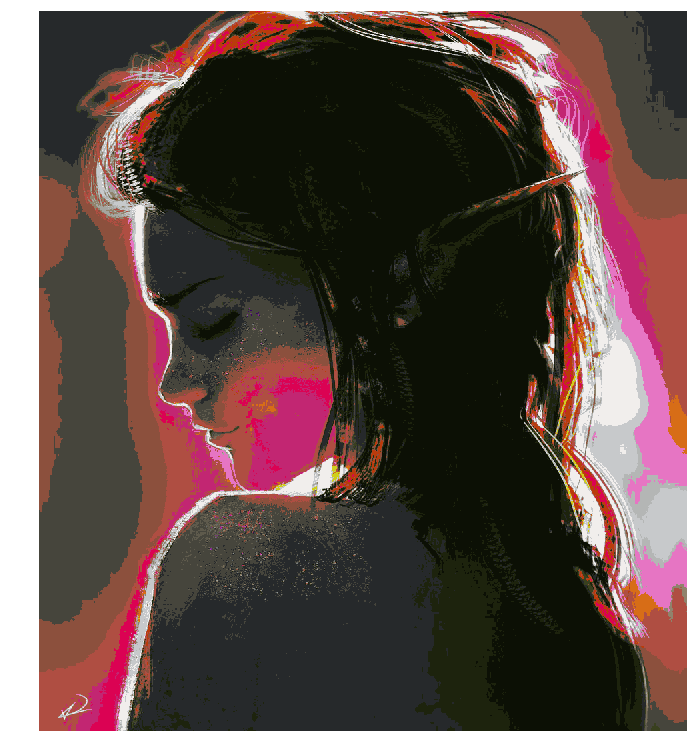

In [10]:
image_g = mpimg.imread('./elf.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_cntrs.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)

plt.axis("off")
plt.imshow(new_image)
plt.show()

Done in: 
60.493308544158936
(1200, 1920, 3)


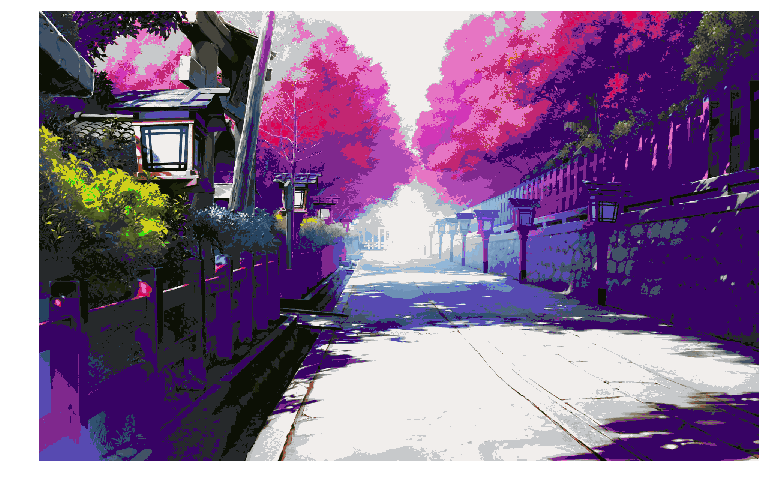

In [11]:
image_g = mpimg.imread('./wallhaven-1151.jpg')
data_g = image_g.reshape((image_g.shape[0]*image_g.shape[1], 3))
new_image = new_cntrs.predict(data_g)
print(image_g.shape)
new_image = new_image.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)

plt.axis("off")
plt.imshow(new_image)
plt.show()

Результат:
* 2 варианта реализации алгоритма KMeans
* Сравнение времени работы п